In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.


In [2]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [85]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [4]:
df_columns=df.columns

columns_list = []
for i in df_columns:
    columns_list.append(i)

columns_list.remove('Date')
columns_list.remove('Year')
columns_list.remove('Home Team')
columns_list.remove('Away Team')

In [5]:
Prediction_Variable = df['Home Score_x_x']
Home_High_Corr_Values = []

In [6]:
for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : -0.2817165149397738
Away Team Ranking_x : 0.22624375527955604
Home Team Spread_x : -0.4705450569905664
Away Team Spread_x : 0.4705450569905664
Total_x : 0.32232809848724636
Home Score_x_x : 0.9999999999999999
Away Score_x_x : -0.0651530057208107
Rolling 5 Past Away Score : -0.10797820700921759
Rolling 5 Past Away Score Avg : -0.1079782070092176
Rolling 5 Past Away Score Max : -0.056255798418219996
Rolling 5 Past Away Score Min : -0.08960629256777503
Rolling 3 Past Away Score : -0.09416260693057878
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279305
Rolling 3 Past Away Score Min : -0.074533568274825
Past Away Score : -0.07097380100304569
Rolling 5 Past Away HI Pass yrds : 0.0673047604788178
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881784
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874467
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601066
Rolling 3 Past Away HI Pass yrds : 0.082241986

Previous Away Completion Attempts : 0.08788589147426773
Rolling 5 Past Away Completion % : -0.06177645460142733
Rolling 5 Past Away Completion % Avg : -0.06177645460142733
Rolling 5 Past Away Completion % Max : -0.07720564497110245
Rolling 5 Past Away Completion % Min : -0.06031979307216996
Rolling 3 Past Away Completion % : -0.04445362076322833
Rolling 3 Past Away Completion % Avg : -0.044453620763228174
Rolling 3 Past Away Completion % Max : -0.017094088043737535
Rolling 3 Past Away Completion % Min : -0.06045781959031687
Previous Away Completion % : -0.06014809598286205
Rolling 5 Past Away Total Yards : -0.014917542566106215
Rolling 5 Past Away Total Yards Avg : -0.014917542566106211
Rolling 5 Past Away Total Yards Max : 0.00769032975201182
Rolling 5 Past Away Total Yards Min : -0.010320380930277684
Rolling 3 Past Away Total Yards : -0.005764940624395601
Rolling 3 Past Away Total Yards Avg : -0.005764940624395585
Rolling 3 Past Away Total Yards Max : 0.022761903218058176
Rolling 3 P

Rolling 5 Past Away Under Odds : 0.04760735939699154
Rolling 5 Past Away Under Odds Avg : 0.0476073593969915
Rolling 5 Past Away Under Odds Max : -0.0017470710757887967
Rolling 5 Past Away Under Odds Min : 0.029311531122017773
Rolling 3 Past Away Under Odds : 0.0676336750028934
Rolling 3 Past Away Under Oddss Avg : 0.06763367500289334
Rolling 3 Past Away Under OddsMax : 0.061298738511963886
Rolling 3 Past Away Under Odds Min : 0.06283623594525493
Previous Away Under Odds : 0.015118308893943548
Rolling 5 Past Away Push Odds : -0.06782492263522713
Rolling 5 Past Away Push Odds Avg : -0.06782492263522709
Rolling 5 Past Away Push Odds Max : -0.06782492263522713
Rolling 5 Past Away Push Odds Min : nan
Rolling 3 Past Away Push Odds : -0.07224724641797824
Rolling 3 Past Away Push Oddss Avg : -0.07224724641797821
Rolling 3 Past Away Push OddsMax : -0.07224724641797824
Rolling 3 Past Away Push Odds Min : nan
Previous Away Push Odds : -0.014455803401996243
Rolling 5 Past Away Total Odds : 0.1473

Rolling 3 Past Home Rushing Avg : 0.13547933130366727
Rolling 3 Past Home Rushing Max : 0.0937534955193561
Rolling 3 Past Home Rushing Min : 0.14942025767717781
Previous Home Rushing : 0.11244208709812123
Rolling 5 Past Home Rushing Attempts : -0.0977091743926239
Rolling 5 Past Home Rushing Attempts Avg : -0.0977091743926239
Rolling 5 Past Home Rushing Attempts Max : -0.10055237617340788
Rolling 5 Past Home Rushing Attempts Min : -0.07351716163865847
Rolling 3 Past Home Rushing Attempts : -0.0795570329690933
Rolling 3 Past Home Rushing Attempts Avg : -0.07955703296909329
Rolling 3 Past Home Rushing Attempts Max : -0.08560041335244906
Rolling 3 Past Home Rushing Attempts Min : -0.06312074919026675
Previous Home Rushing Attempts : -0.07260431407527868
Rolling 5 Past Home Yards per Rush : 0.14241593763740804
Rolling 5 Past Home Yards per Rush Avg : 0.14241593763740804
Rolling 5 Past Home Yards per Rush Max : 0.09867747824169316
Rolling 5 Past Home Yards per Rush Min : 0.12154071107408788


Rolling 3 Past H&A HI Pass yrds Min_Home_Team : 0.19711186537852424
Previous H&A HI Pass yrds_Home_Team : 0.18439911052331132
Rolling 5 Past H&A HI Rush yrds_Home_Team : 0.09724212020322462
Rolling 5 Past H&A HI Rush yrds Avg_Home_Team : 0.09724212020322462
Rolling 5 Past H&A HI Rush yrds Max_Home_Team : 0.052191897281508304
Rolling 5 Past H&A HI Rush yrds Min_Home_Team : 0.09946140504227097
Rolling 3 Past H&A HI Rush yrds_Home_Team : 0.06690017256157758
Rolling 3 Past H&A HI Rush yrds Avg_Home_Team : 0.06690017256157754
Rolling 3 Past H&A HI Rush yrds Max_Home_Team : 0.03631643963910313
Rolling 3 Past H&A HI Rush yrds Min_Home_Team : 0.08519839389383697
Previous H&A HI Rush yrds_Home_Team : 0.056547559855541565
Rolling 5 Past H&A HI REC yrds_Home_Team : 0.24616802268194712
Rolling 5 Past H&A HI REC yrds Avg_Home_Team : 0.2461680226819471
Rolling 5 Past H&A HI REC yrds Max_Home_Team : 0.20646928284427027
Rolling 5 Past H&A HI REC yrds Min_Home_Team : 0.19255977168242513
Rolling 3 Past 

Rolling 3 Past H&A Possession Time Min_Home_Team : 0.1401607498469397
Previous H&A Possession Time_Home_Team : 0.14562215854884147
Rolling 5 Past H&A Q1 Score_Home_Team : 0.25668655126758716
Rolling 5 Past H&A Q1 Score Avg_Home_Team : 0.25668655126758716
Rolling 5 Past H&A Q1 Score Max_Home_Team : 0.2030047854397886
Rolling 5 Past H&A Q1 Score Min_Home_Team : 0.17388258666581438
Rolling 3 Past H&A Q1 Score_Home_Team : 0.23236681078848867
Rolling 3 Past H&A Q1 Score Avg_Home_Team : 0.23236681078848873
Rolling 3 Past H&A Q1 Score Max_Home_Team : 0.2212758508239849
Rolling 3 Past H&A Q1 Score Min_Home_Team : 0.14852526993027973
Previous H&A Q1 Score_Home_Team : 0.21353844607099554
Rolling 5 Past H&A Q2 Score_Home_Team : 0.232104881669524
Rolling 5 Past H&A Q2 Score Avg_Home_Team : 0.23210488166952406
Rolling 5 Past H&A Q2 Score Max_Home_Team : 0.17487244109829767
Rolling 5 Past H&A Q2 Score Min_Home_Team : 0.18966677916394892
Rolling 3 Past H&A Q2 Score_Home_Team : 0.19205111848401973
Rol

Rolling 5 Past H&A Conf T Wins_Away_Team : -0.23307753629068134
Rolling 5 Past H&A Conf T Wins Avg_Away_Team : -0.23307753629068143
Rolling 5 Past H&A Conf T Wins Max_Away_Team : -0.23118976935877536
Rolling 5 Past H&A Conf T Wins Min_Away_Team : -0.15552410823014998
Rolling 3 Past H&A Conf T Wins_Away_Team : -0.20914836372293816
Rolling 3 Past H&A Conf T Wins Avg_Away_Team : -0.20914836372293827
Rolling 3 Past H&A Conf T Wins Max_Away_Team : -0.2130780573996949
Rolling 3 Past H&A Conf T Wins Min_Away_Team : -0.15590826880229938
Previous H&A Conf Wins_Away_Team : -0.18667769437535991
Rolling 5 Past H&A Conf T Losses_Away_Team : 0.2482783972063846
Rolling 5 Past H&A Conf T Losses Avg_Away_Team : 0.24827839720638453
Rolling 5 Past H&A Conf T Losses Max_Away_Team : 0.24076177293861706
Rolling 5 Past H&A Conf T Losses Min_Away_Team : 0.1562927109222814
Rolling 3 Past H&A Conf T Losses_Away_Team : 0.2250829606874941
Rolling 3 Past H&A Conf T Losses Avg_Away_Team : 0.2250829606874942
Rolling

Rolling 3 Past H&A Q2 Score Max_Away_Team : -0.06740867223645675
Rolling 3 Past H&A Q2 Score Min_Away_Team : -0.030556505244512117
Previous H&A Q2 Score_Away_Team : -0.08957346081568564
Rolling 5 Past H&A Q3 Score_Away_Team : -0.09693234108930938
Rolling 5 Past H&A Q3 Score Avg_Away_Team : -0.09693234108930947
Rolling 5 Past H&A Q3 Score Max_Away_Team : -0.07752340455189184
Rolling 5 Past H&A Q3 Score Min_Away_Team : -0.04871100845200377
Rolling 3 Past H&A Q3 Score_Away_Team : -0.05351234340003874
Rolling 3 Past H&A Q3 Score Avg_Away_Team : -0.053512343400038714
Rolling 3 Past H&A Q3 Score Max_Away_Team : -0.03173966981080382
Rolling 3 Past H&A Q3 Score Min_Away_Team : -0.03713450844153471
Previous H&A Q3 Score_Away_Team : -0.06519673380664129
Rolling 5 Past H&A Q4 Score_Away_Team : -0.039216067029549904
Rolling 5 Past H&A Q4 Score Avg_Away_Team : -0.0392160670295499
Rolling 5 Past H&A Q4 Score Max_Away_Team : -0.008353354712807548
Rolling 5 Past H&A Q4 Score Min_Away_Team : -0.0423614

In [7]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [8]:
#for i in Home_High_Corr_Values:
  #  plt.scatter(df[i],df['Home Score_x_x'])
   # plt.xlabel(i)
   # plt.ylabel('Home Score')
   # plt.title(i + " "+'Correlation')
   # plt.show()
   # print(i,":", df[i].corr(df['Home Score_x_x']) )

In [9]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [10]:
df2 = df.dropna()
Home_High_Corr_Values.remove('Home Score_x_x')

In [11]:
X = df2[Home_High_Corr_Values]
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df2["Home Score_x_x"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [12]:
print(X_train.shape,X_test.shape)

(652, 15) (218, 15)


In [13]:
print(y_train.shape,y_test.shape)

(652,) (218,)


In [14]:
rModel3 = sm.OLS(y_train, X_train)

In [15]:
rModel3_results = rModel3.fit()

In [16]:
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Home Score_x_x   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     40.13
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           6.05e-52
Time:                        20:05:13   Log-Likelihood:                -2475.2
No. Observations:                 652   AIC:                             4968.
Df Residuals:                     643   BIC:                             5009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -3.8131      3.558     -1.072      0.284     -10.799       3.173
Home Team Spread_x                                 -0.2237      0.019    -11.493      0.000      -0.262      -0.186
Away Team Spread_x                                  0.2237      0.019     11.493      0.000       0.186       0.262
Total_x                                             0.4345      0.062      7.055      0.000       0.314       0.555
Rolling 5 Past H&A Score_Home_Team                 -0.0247      0.023     -1.077      0.282      -0.070       0.020
Rolling 5 Past H&A Score Avg_Home_Team             -0.0049      0.005     -1.077      0.282      -0.014       0.004
Rolling 5 Past H&A 1st Downs_Home_Team              0.0413      0.055      0.751      0.453      -0.067       0.149
Rolling 5 Past H&A 1st Downs Avg_Home_Team          0.0083      0.011      0.751      0.453      -0.013       0.030
Rolling 5 Past H&A Total Yards_Home_Team            0.0014      0.003      0.429      0.668      -0.005       0.008
Rolling 5 Past H&A Total Yards Avg_Home_Team        0.0003      0.001      0.429      0.668      -0.001       0.002
Rolling 5 Past H&A Yards per Pass_Home_Team         0.0651      0.092      0.708      0.479      -0.116       0.246
Rolling 5 Past H&A Yards per Pass Avg_Home_Team     0.0130      0.018      0.708      0.479      -0.023       0.049
Rolling 5 Past H&A Spread_Home_Team                 0.0107      0.021      0.498      0.619      -0.031       0.053
Rolling 5 Past H&A Spread Avg_Home_Team             0.0021      0.004      0.498      0.619      -0.006       0.011
Rolling 5 Past H&A Spread Min_Home_Team            -0.1163      0.086     -1.360      0.174      -0.284       0.052
==============================================================================
Omnibus:                        7.412   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.601
Skew:                           0.185   Prob(JB):                       0.0369
Kurtosis:                       2.674   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
y_pred = rModel3_results.predict(X_test)

Text(0, 0.5, 'predictions')

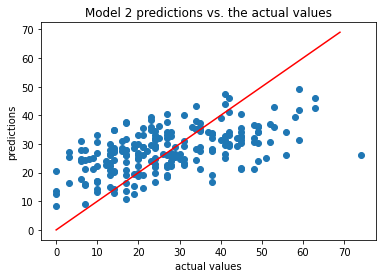

In [18]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test,y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,70)],[x for x in range(0,70)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel ("actual values")
plt.ylabel("predictions")

# Random Forest

In [19]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics

In [20]:
df2['H/A Winner'] = df2.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)

<ipython-input-20-11fcd299100a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['H/A Winner'] = df2.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)


In [21]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [22]:
df2['Total Points'] = df2['Home Score_x_x'] + df2['Away Score_x_x']
df2['Actual Score Over/Under'] = df2['Total Points'] - df2['Total_x']
df2['Over/Under'] = df2.apply(lambda x: 1 if x['Actual Score Over/Under'] > 0 else (2 if x['Actual Score Over/Under'] < 1 else 0),axis=1)
                             
                             

<ipython-input-22-3536dbf44b97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Points'] = df2['Home Score_x_x'] + df2['Away Score_x_x']
<ipython-input-22-3536dbf44b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Actual Score Over/Under'] = df2['Total Points'] - df2['Total_x']
<ipython-input-22-3536dbf44b97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [23]:
df2.head()

Date  Year   Home Team  Home Team Ranking_x  Away Team  \
1 2021-12-04  2021     Alabama                    3    Georgia   
2 2021-11-27  2021         LSU                   99  Texas A&M   
3 2021-11-27  2021      Auburn                   99    Alabama   
4 2021-11-27  2021  Vanderbilt                   99  Tennessee   
5 2021-11-26  2021    Arkansas                   25   Missouri   

   Away Team Ranking_x  Home Team Spread_x  Away Team Spread_x  Total_x  \
1                    1                 6.5                -6.5     49.0   
2                   15                 6.5                -6.5     27.0   
3                    3                19.5               -19.5     55.5   
4                   99                31.5               -31.5     63.5   
5                   99               -14.5                14.5     63.0   

   Home Score_x_x  Away Score_x_x  Rolling 5 Past Away Score  \
1            41.0            24.0                      220.0   
2            27.0            24.0                      129.0   
3            22.0            24.0                      222.0   
4            21.0            45.0                      187.0   
5            34.0            17.0                      120.0   

   Rolling 5 Past Away Score Avg  Rolling 5 Past Away Score Max  \
1                           44.0                           62.0   
2                           25.8                           35.0   
3                           44.4                           52.0   
4                           37.4                           62.0   
5                           24.0                           37.0   

   Rolling 5 Past Away Score Min  Rolling 3 Past Away Score  \
1                           34.0                      109.0   
2                           10.0                       64.0   
3                           31.0                      118.0   
4                           14.0                      131.0   
5                            6.0                       71.0   

   Rolling 3 Past Away Score Avg  Rolling 3 Past Away Score Max  \
1                      36.333333                           41.0   
2                      21.333333                           35.0   
3                      39.333333                           49.0   
4                      43.666667                           62.0   
5                      23.666667                           37.0   

   Rolling 3 Past Away Score Min  Past Away Score  \
1                           34.0             41.0   
2                           10.0             19.0   
3                           31.0             49.0   
4                           24.0             45.0   
5                            6.0              6.0   

   Rolling 5 Past Away HI Pass yrds  Rolling 5 Past Away HI Pass yrds Avg  \
1                            1055.0                                 211.0   
2                            1013.0                                 202.6   
3                            1583.0                                 316.6   
4                            1251.0                                 250.2   
5                            1018.0                                 203.6   

   Rolling 5 Past Away HI Pass yrds Max  Rolling 5 Past Away HI Pass yrds Min  \
1                                 299.0                                 151.0   
2                                 281.0                                 148.0   
3                                 418.0                                 208.0   
4                                 316.0                                 207.0   
5                                 294.0                                  78.0   

   Rolling 3 Past Away HI Pass yrds  Rolling 3 Past Away HI Pass yrds Avg  \
1                             605.0                            201.666667   
2                             536.0                            178.666667   
3                             957.0                            319.000000   
4            

In [24]:


Home_High_Corr_Values.append('Over/Under')


In [25]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under']

In [26]:
df3 = df2[Home_High_Corr_Values]

In [27]:
X = df3.drop('Over/Under',axis=1).values
y = df3['Over/Under'].values

In [28]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': [100,200,300,400],
              'max_depth': [1,3,5,7],
              'criterion': ['gini','entropy'],
    
}



In [29]:
model = model_selection.GridSearchCV(
estimator = classifier,
param_grid = param_grid,
scoring = 'accuracy',
n_jobs = 1,
cv=5
)

In [30]:
model.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [31]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5482758620689655
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Random Grid Seach - Over/Under

In [32]:
X = df3.drop('Over/Under',axis=1).values
y = df3['Over/Under'].values

In [33]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': np.arange(100,1500,100),
              'max_depth': np.arange(1,20,1),
              'criterion': ['gini','entropy'],
    
}


In [34]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [35]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 1/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; total time=   0.7s
[CV 2/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 2/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; total time=   0.6s
[CV 3/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 3/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; total time=   0.6s
[CV 4/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 4/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; total time=   0.6s
[CV 5/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 5/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; total time=   0.6s
[CV 1/5; 2/10] START criterion=entropy, max_depth=16, n_estimators=600..........
[CV 1/5;

[CV 4/5; 10/10] END criterion=entropy, max_depth=1, n_estimators=1000; total time=   1.5s
[CV 5/5; 10/10] START criterion=entropy, max_depth=1, n_estimators=1000.........
[CV 5/5; 10/10] END criterion=entropy, max_depth=1, n_estimators=1000; total time=   1.4s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [36]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5402298850574713
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Scaled data

In [37]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import pipeline

In [38]:
scl = preprocessing.StandardScaler()
pca = decomposition.PCA()
rf = ensemble.RandomForestClassifier(n_jobs=-1)

In [39]:
classifier = pipeline.Pipeline(
    [
        ("scaling", scl),
        ("pca", pca),
        ("rf",rf)
    ]
)

In [40]:

param_grid = { 'pca__n_components': np.arange(5,10),
              'rf__n_estimators': np.arange(100,1500,100),
              'rf__max_depth': np.arange(1,20,1),
              'rf__criterion': ['gini','entropy'],
    
}


In [41]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [42]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400
[CV 1/5; 1/10] END pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400; total time=   0.9s
[CV 2/5; 1/10] START pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400
[CV 2/5; 1/10] END pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400; total time=   0.8s
[CV 3/5; 1/10] START pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400
[CV 3/5; 1/10] END pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400; total time=   0.8s
[CV 4/5; 1/10] START pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400
[CV 4/5; 1/10] END pca__n_components=7, rf__criterion=gini, rf__max_depth=19, rf__n_estimators=400; total time=   0.8s
[CV 5/5; 1/10] START pca__n_components=7, rf__criterion=gin

[CV 3/5; 8/10] END pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=1100; total time=   1.6s
[CV 4/5; 8/10] START pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=1100
[CV 4/5; 8/10] END pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=1100; total time=   1.7s
[CV 5/5; 8/10] START pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=1100
[CV 5/5; 8/10] END pca__n_components=5, rf__criterion=gini, rf__max_depth=3, rf__n_estimators=1100; total time=   1.6s
[CV 1/5; 9/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=1400
[CV 1/5; 9/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=1400; total time=   2.6s
[CV 2/5; 9/10] START pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=1400
[CV 2/5; 9/10] END pca__n_components=9, rf__criterion=gini, rf__max_depth=13, rf__n_estimators=1400; total time=   2.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1))]),
                   n_jobs=1,
                   param_distributions={'pca__n_components': array([5, 6, 7, 8, 9]),
                                        'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'rf__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [43]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.535632183908046
{'memory': None, 'steps': [('scaling', StandardScaler()), ('pca', PCA(n_components=9)), ('rf', RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=-1))], 'verbose': False, 'scaling': StandardScaler(), 'pca': PCA(n_components=9), 'rf': RandomForestClassifier(max_depth=3, n_estimators=200, n_jobs=-1), 'scaling__copy': True, 'scaling__with_mean': True, 'scaling__with_std': True, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 9, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_impurity_split': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__min_weight_fraction_leaf': 0.0, 'rf__n_estimators': 200, 'rf__n_jobs': -1, 'rf__oob_score': False, 'rf__

# RF Home/Away Winner

In [44]:
Prediction_Variable = df['Away Score_x_x']


for i in columns_list:
    corr = df[i].corr(Prediction_Variable) 
    print(i,":",corr)
    if corr > .3:
        Home_High_Corr_Values.append(i)
    if corr < -.3:
        Home_High_Corr_Values.append(i)

Home Team Ranking_x : 0.23709573530568462
Away Team Ranking_x : -0.27414898272945826
Home Team Spread_x : 0.5266032684250008
Away Team Spread_x : -0.5266032684250008
Total_x : 0.28311043106396566
Home Score_x_x : -0.0651530057208107
Away Score_x_x : 0.9999999999999999
Rolling 5 Past Away Score : 0.2811338260289943
Rolling 5 Past Away Score Avg : 0.28113382602899434
Rolling 5 Past Away Score Max : 0.23817026101835914
Rolling 5 Past Away Score Min : 0.23586347782876363
Rolling 3 Past Away Score : 0.2912625997213864
Rolling 3 Past Away Score Avg : 0.29126259972138646
Rolling 3 Past Away Score Max : 0.25795138122609995
Rolling 3 Past Away Score Min : 0.25082981301662993
Past Away Score : 0.23163309815940225
Rolling 5 Past Away HI Pass yrds : 0.168761399735696
Rolling 5 Past Away HI Pass yrds Avg : 0.16876139973569593
Rolling 5 Past Away HI Pass yrds Max : 0.11083831295914295
Rolling 5 Past Away HI Pass yrds Min : 0.16702780126144104
Rolling 3 Past Away HI Pass yrds : 0.18419750291955925
Ro

Previous Away Passing : 0.15648402701502678
Rolling 5 Past Away Yards per Pass : 0.26471398351144604
Rolling 5 Past Away Yards per Pass Avg : 0.26471398351144604
Rolling 5 Past Away Yards per Pass Max : 0.22214496723095864
Rolling 5 Past Away Yards per Pass Min : 0.21536418799234575
Rolling 3 Past Away Yards per Pass : 0.2682466278612711
Rolling 3 Past Away Yards per Pass Avg : 0.2682466278612709
Rolling 3 Past Away Yards per Pass Max : 0.2300484724134668
Rolling 3 Past Away Yards per Pass Min : 0.24176064759342786
Previous Away Yards per Pass : 0.2374237675549758
Rolling 5 Past Away Rushing : 0.18828278234616108
Rolling 5 Past Away Rushing Avg : 0.1882827823461611
Rolling 5 Past Away Rushing Max : 0.1263577150892272
Rolling 5 Past Away Rushing Min : 0.1815421222920707
Rolling 3 Past Away Rushing : 0.18904695117772352
Rolling 3 Past Away Rushing Avg : 0.18904695117772355
Rolling 3 Past Away Rushing Max : 0.15019253328027413
Rolling 3 Past Away Rushing Min : 0.1766533018933943
Previous 

Previous Away Total Odds : 0.1467476173588267
Rolling 5 Past Home Score : -0.04490983290024438
Rolling 5 Past Home Score Avg : -0.0449098329002444
Rolling 5 Past Home Score Max : 0.008973508452841355
Rolling 5 Past Home Score Min : -0.08078627433601375
Rolling 3 Past Home Score : -0.0417390079549746
Rolling 3 Past Home Score Avg : -0.04173900795497459
Rolling 3 Past Home Score Max : -0.011171336423618188
Rolling 3 Past Home Score Min : -0.08662927268128855
Past Home Score : -0.068164067371554
Rolling 5 Past Home HI Pass yrds : 0.05961184753194503
Rolling 5 Past Home HI Pass yrds Avg : 0.05961184753194505
Rolling 5 Past Home HI Pass yrds Max : 0.0702851961861912
Rolling 5 Past Home HI Pass yrds Min : -0.016976215240768103
Rolling 3 Past Home HI Pass yrds : 0.04656519094094305
Rolling 3 Past Home HI Pass yrds Avg : 0.04656519094094304
Rolling 3 Past Home HI Pass yrds Max : 0.03473891652826316
Rolling 3 Past Home HI Pass yrds Min : 0.025482998694267876
Previous Home HI Pass yrds : 0.03972

Rolling 3 Past Home 4th Down Conversion % Min : 0.08697496195077237
Previous Home 4th Down Conversions % : 0.04182269804570188
Rolling 5 Past Home Completions : 0.10938074063267565
Rolling 5 Past Home Completions Avg : 0.10938074063267565
Rolling 5 Past Home Completions Max : 0.10135409313162347
Rolling 5 Past Home Completions Min : 0.07423932230456137
Rolling 3 Past Home Completions : 0.09468661530824932
Rolling 3 Past Home Completions Avg : 0.09468661530824939
Rolling 3 Past Home Completions Max : 0.06008475582071835
Rolling 3 Past Home Completions Min : 0.10957148470045958
Previous Home Completions : 0.08285837993899306
Rolling 5 Past Home Completion Attempts : 0.13677584322111241
Rolling 5 Past Home Completion Attempts Avg : 0.1367758432211126
Rolling 5 Past Home Completion Attempts Max : 0.10931630597757049
Rolling 5 Past Home Completion Attempts Min : 0.11306961880800145
Rolling 3 Past Home Completion Attempts : 0.12990249776670942
Rolling 3 Past Home Completion Attempts Avg : 0.

Rolling 5 Past Home ATS Win Min : 0.0447286286083747
Rolling 3 Past Home ATS Win : 0.058181032532750095
Rolling 3 Past Home ATS Win Avg : 0.05818103253275017
Rolling 3 Past Home ATS Win Max : 0.0027539073393025196
Rolling 3 Past Home ATS Win Min : 0.04699055242924507
Previous Home ATS Win : 0.09293803383593682
Rolling 5 Past Home ATS Push : -0.006548993318256533
Rolling 5 Past Home ATS Push Avg : -0.006548993318256549
Rolling 5 Past Home ATS Push Max : 0.0013788108366997712
Rolling 5 Past Home ATS Push Min : nan
Rolling 3 Past Home ATS Push : 0.03273926819785843
Rolling 3 Past Home ATS Push Avg : 0.03273926819785848
Rolling 3 Past Home ATS Push Max : 0.03817362420143961
Rolling 3 Past Home ATS Push Min : nan
Previous Home ATS Push : -0.0170371154729272
Rolling 5 Past Home ATS Loss : -0.09773238144553593
Rolling 5 Past Home ATS Loss Avg : -0.09773238144553605
Rolling 5 Past Home ATS Loss Max : -0.03429163891200594
Rolling 5 Past Home ATS Loss Min : 0.004597923841652628
Rolling 3 Past Ho

Rolling 5 Past H&A Passing Max_Home_Team : 0.04748390495751376
Rolling 5 Past H&A Passing Min_Home_Team : 0.056977271727780034
Rolling 3 Past H&A Passing_Home_Team : 0.05687149536755502
Rolling 3 Past H&A Passing Avg_Home_Team : 0.05687149536755504
Rolling 3 Past H&A Passing Max_Home_Team : 0.0627745131587207
Rolling 3 Past H&A Passing Min_Home_Team : 0.034097518155705
Previous H&A Passing_Home_Team : 0.04770143889928867
Rolling 5 Past H&A Yards per Pass_Home_Team : -0.09130297638611025
Rolling 5 Past H&A Yards per Pass Avg_Home_Team : -0.09130297638611032
Rolling 5 Past H&A Yards per Pass Max_Home_Team : -0.1275369095226865
Rolling 5 Past H&A Yards per Pass Min_Home_Team : -0.009352291769472013
Rolling 3 Past H&A Yards per Pass_Home_Team : -0.07443631464502004
Rolling 3 Past H&A Yards per Pass Avg_Home_Team : -0.07443631464502005
Rolling 3 Past H&A Yards per Pass Max_Home_Team : -0.07615350604894076
Rolling 3 Past H&A Yards per Pass Min_Home_Team : -0.040574758044222774
Previous H&A Y

Rolling 5 Past H&A Q3 Score Avg_Home_Team : -0.10939914002940951
Rolling 5 Past H&A Q3 Score Max_Home_Team : -0.09373126072682653
Rolling 5 Past H&A Q3 Score Min_Home_Team : -0.047713425608901655
Rolling 3 Past H&A Q3 Score_Home_Team : -0.08042427904263273
Rolling 3 Past H&A Q3 Score Avg_Home_Team : -0.08042427904263283
Rolling 3 Past H&A Q3 Score Max_Home_Team : -0.08423230414620524
Rolling 3 Past H&A Q3 Score Min_Home_Team : -0.06525895057943916
Previous H&A Q3 Score_Home_Team : -0.0528621191585377
Rolling 5 Past H&A Q4 Score_Home_Team : -0.016555204082465046
Rolling 5 Past H&A Q4 Score Avg_Home_Team : -0.01655520408246504
Rolling 5 Past H&A Q4 Score Max_Home_Team : 0.01704196004434459
Rolling 5 Past H&A Q4 Score Min_Home_Team : -0.051278193948907085
Rolling 3 Past H&A Q4 Score_Home_Team : -0.03148161105130684
Rolling 3 Past H&A Q4 Score Avg_Home_Team : -0.03148161105130684
Rolling 3 Past H&A Q4 Score Max_Home_Team : -0.013643979962419067
Rolling 3 Past H&A Q4 Score Min_Home_Team : -

Rolling 3 Past H&A 4th Down Conversions Max_Away_Team : -0.038414325728777024
Rolling 3 Past H&A 4th Down Conversions Min_Away_Team : -0.04389541022530106
Previous H&A 4th Down Conversions_Away_Team : -0.016299484290422585
Rolling 5 Past H&A 4th Down Conversion Attempts_Away_Team : -0.10199987355609746
Rolling 5 Past H&A 4th Down Conversion Attempts Avg_Away_Team : -0.10199987355609753
Rolling 5 Past H&A 4th Down Conversion Attempts Max_Away_Team : -0.03162345019798277
Rolling 5 Past H&A 4th Down Conversion Attempts Min_Away_Team : -0.11467336881148696
Rolling 3 Past H&A 4th Down Conversion Attempts_Away_Team : -0.10546458400777735
Rolling 3 Past H&A 4th Down Conversion Attempts Avg_Away_Team : -0.1054645840077774
Rolling 3 Past H&A 4th Down Conversion Attempts Max_Away_Team : -0.0929591115847833
Rolling 3 Past H&A 4th Down Conversion Attempts Min_Away_Team : -0.09114386684235763
Previous H&A 4th Down Conversions Attempts_Away_Team : -0.04470434726612273
Rolling 5 Past H&A 4th Down Con

Rolling 5 Past H&A Yards per Penalty Avg_Away_Team : 0.04347625337852889
Rolling 5 Past H&A Yards per Penalty Max_Away_Team : 0.03743205632222226
Rolling 5 Past H&A Yards per Penalty Min_Away_Team : 0.04260883855632715
Rolling 3 Past H&A Yards per Penalty_Away_Team : 0.05699656247731371
Rolling 3 Past H&A Yards per Penalty Avg_Away_Team : 0.056996562477313724
Rolling 3 Past H&A Yards per Penalty Max_Away_Team : 0.04227127875672198
Rolling 3 Past H&A Yards per Penalty Min_Away_Team : 0.06129746257667604
Previous H&A Yards per Penalty_Away_Team : 0.021621107134937343
Rolling 5 Past H&A Turnovers_Away_Team : -0.11047445602492689
Rolling 5 Past H&A Turnovers Avg_Away_Team : -0.11047445602492684
Rolling 5 Past H&A Turnovers Max_Away_Team : -0.11226827119839916
Rolling 5 Past H&A Turnovers Min_Away_Team : -0.02408995736514342
Rolling 3 Past H&A Turnovers_Away_Team : -0.10717967067462328
Rolling 3 Past H&A Turnovers Avg_Away_Team : -0.10717967067462318
Rolling 3 Past H&A Turnovers Max_Away_Te

In [45]:
Home_Away_High_Corr_Values = Home_High_Corr_Values

In [46]:

Home_Away_High_Corr = []
for i in Home_Away_High_Corr_Values:
    if i not in Home_Away_High_Corr :
        Home_Away_High_Corr.append(i)

In [47]:
Home_Away_High_Corr 

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Over/Under',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Ya

In [48]:
Home_Away_High_Corr.append('H/A Winner')
Home_Away_High_Corr.remove('Over/Under')
Home_Away_High_Corr.remove('Away Score_x_x')

In [49]:
df4 = df2[Home_Away_High_Corr]

In [50]:
df4.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team,H/A Winner
1,6.5,-6.5,49.0,187.0,37.4,118.0,23.6,2484.0,496.8,49.3,9.86,-111.5,-22.3,-29.0,182.0,36.4,43.0,118.0,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0,1
2,6.5,-6.5,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,30.9,6.18,55.5,11.1,2.0,159.0,31.8,44.0,83.0,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0,1
3,19.5,-19.5,55.5,123.0,24.6,111.0,22.2,1998.0,399.6,38.5,7.70,-6.5,-1.3,-7.0,201.0,40.2,52.0,114.0,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0,0
4,31.5,-31.5,63.5,88.0,17.6,81.0,16.2,1569.0,313.8,31.4,6.28,112.5,22.5,16.0,157.0,31.4,45.0,86.0,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0,0
5,-14.5,14.5,63.0,156.0,31.2,125.0,25.0,2280.0,456.0,40.4,8.08,14.0,2.8,-4.5,112.0,22.4,37.0,61.0,20.333333,93.0,18.6,1827.0,365.4,32.0,6.40,46.0,9.2,99.0,1


In [51]:
X = df4.drop('H/A Winner',axis=1).values
y = df4['H/A Winner'].values

In [52]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': [100,200,300,400],
              'max_depth': [1,3,5,7],
              'criterion': ['gini','entropy'],
    
}


In [53]:
model = model_selection.GridSearchCV(
estimator = classifier,
param_grid = param_grid,
scoring = 'accuracy',
n_jobs = 1,
cv=5
)

In [54]:
model.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [55]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.7505747126436783
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Random Grid Search - H/A Winner

In [65]:
df = df.dropna()

In [66]:
df['H/A Winner'] = df.apply(lambda x: 1 if x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1)

In [67]:
df5 = df[Home_Away_High_Corr].dropna()
df5.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team,H/A Winner
1,6.5,-6.5,49.0,187.0,37.4,118.0,23.6,2484.0,496.8,49.3,9.86,-111.5,-22.3,-29.0,182.0,36.4,43.0,118.0,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0,1
2,6.5,-6.5,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,30.9,6.18,55.5,11.1,2.0,159.0,31.8,44.0,83.0,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0,1
3,19.5,-19.5,55.5,123.0,24.6,111.0,22.2,1998.0,399.6,38.5,7.70,-6.5,-1.3,-7.0,201.0,40.2,52.0,114.0,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0,0
4,31.5,-31.5,63.5,88.0,17.6,81.0,16.2,1569.0,313.8,31.4,6.28,112.5,22.5,16.0,157.0,31.4,45.0,86.0,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0,0
5,-14.5,14.5,63.0,156.0,31.2,125.0,25.0,2280.0,456.0,40.4,8.08,14.0,2.8,-4.5,112.0,22.4,37.0,61.0,20.333333,93.0,18.6,1827.0,365.4,32.0,6.40,46.0,9.2,99.0,1


In [68]:
X = df5.drop('H/A Winner',axis=1).values
y = df5['H/A Winner'].values

In [69]:
classifier = RandomForestClassifier(n_jobs=-1)
param_grid = { 'n_estimators': np.arange(100,1500,100),
              'max_depth': np.arange(1,20,1),
              'criterion': ['gini','entropy'],
    
}


In [70]:
model = model_selection.RandomizedSearchCV(
estimator = classifier,
param_distributions = param_grid,
scoring = 'accuracy',
n_iter = 10,
n_jobs = 1,
verbose=10,
cv=5
)

In [71]:
model.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=8, n_estimators=100..............
[CV 1/5; 1/10] END criterion=gini, max_depth=8, n_estimators=100; total time=   0.3s
[CV 2/5; 1/10] START criterion=gini, max_depth=8, n_estimators=100..............
[CV 2/5; 1/10] END criterion=gini, max_depth=8, n_estimators=100; total time=   0.2s
[CV 3/5; 1/10] START criterion=gini, max_depth=8, n_estimators=100..............
[CV 3/5; 1/10] END criterion=gini, max_depth=8, n_estimators=100; total time=   0.2s
[CV 4/5; 1/10] START criterion=gini, max_depth=8, n_estimators=100..............
[CV 4/5; 1/10] END criterion=gini, max_depth=8, n_estimators=100; total time=   0.3s
[CV 5/5; 1/10] START criterion=gini, max_depth=8, n_estimators=100..............
[CV 5/5; 1/10] END criterion=gini, max_depth=8, n_estimators=100; total time=   0.3s
[CV 1/5; 2/10] START criterion=entropy, max_depth=8, n_estimators=400...........
[CV 1/5; 2/10] END criterion

[CV 4/5; 10/10] END criterion=entropy, max_depth=17, n_estimators=500; total time=   1.2s
[CV 5/5; 10/10] START criterion=entropy, max_depth=17, n_estimators=500.........
[CV 5/5; 10/10] END criterion=entropy, max_depth=17, n_estimators=500; total time=   1.1s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [72]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.7459770114942529
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1300, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=246)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
classifier = RandomForestClassifier(n_estimators=1300,max_depth=4,criterion='entropy',n_jobs=-1)
model = classifier.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.748
Random Forest: f1-score=0.745
